In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# import train and test data
dfTrain = pd.read_csv('amazon_train.csv')
dfTest = pd.read_csv('amazon_test.csv')
print(dfTrain.shape)
print(dfTest.shape)

(32769, 10)
(912363, 10)


In [4]:
dfTrain.columns

Index(['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE'],
      dtype='object')

In [5]:
dfTest.columns

Index(['id', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE'],
      dtype='object')

In [6]:
# EDA

In [7]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [11]:
dfTrain.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [9]:
dfTrain.describe()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000
mean,0.942110,42923.916171,25988.957979,116952.627788,118301.823156,118912.779914,125916.152644,170178.369648,183703.408893,119789.430132
std,0.233539,34173.892702,35928.031650,10875.563591,4551.588572,18961.322917,31036.465825,69509.462130,100488.407413,5784.275516
min,0.000000,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000
25%,1.000000,20299.000000,4566.000000,117961.000000,118102.000000,118395.000000,118274.000000,117906.000000,118363.000000,118232.000000
50%,1.000000,35376.000000,13545.000000,117961.000000,118300.000000,118921.000000,118568.000000,128696.000000,119006.000000,118570.000000
75%,1.000000,74189.000000,42034.000000,117961.000000,118386.000000,120535.000000,120006.000000,235280.000000,290919.000000,119348.000000
max,1.000000,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000


Here action is the output variable. Output is the categorical type. Hence we need classification.

In [26]:
allcolumns = dfTrain.columns
for item in allcolumns:
    print(dfTrain[item].nunique())

2
7518
4243
128
177
449
343
2358
67
343


In [27]:
print(dfTrain.ACTION.unique())

[1 0]


In [29]:
# Check coorelatioin
corr = dfTrain.corr()
corr

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
ACTION,1.000000,0.000185,-0.005167,-0.013702,0.005179,0.001025,-0.010169,0.003565,0.000502,0.017147
RESOURCE,0.000185,1.000000,0.011088,-0.005016,0.013438,0.030004,0.002936,0.021029,0.031060,0.007733
MGR_ID,-0.005167,0.011088,1.000000,-0.007132,-0.000364,-0.009551,0.017864,-0.018488,-0.118254,-0.004067
ROLE_ROLLUP_1,-0.013702,-0.005016,-0.007132,1.000000,0.033358,-0.009548,0.010207,-0.007546,0.029468,-0.024927
ROLE_ROLLUP_2,0.005179,0.013438,-0.000364,0.033358,1.000000,-0.006056,0.008305,0.018873,0.069558,0.015117
ROLE_DEPTNAME,0.001025,0.030004,-0.009551,-0.009548,-0.006056,1.000000,-0.006932,-0.002877,0.031669,0.010319
ROLE_TITLE,-0.010169,0.002936,0.017864,0.010207,0.008305,-0.006932,1.000000,0.170692,-0.012450,0.155920
ROLE_FAMILY_DESC,0.003565,0.021029,-0.018488,-0.007546,0.018873,-0.002877,0.170692,1.000000,-0.180596,0.092980
ROLE_FAMILY,0.000502,0.031060,-0.118254,0.029468,0.069558,0.031669,-0.012450,-0.180596,1.000000,-0.148625
ROLE_CODE,0.017147,0.007733,-0.004067,-0.024927,0.015117,0.010319,0.155920,0.092980,-0.148625,1.000000


<AxesSubplot: >

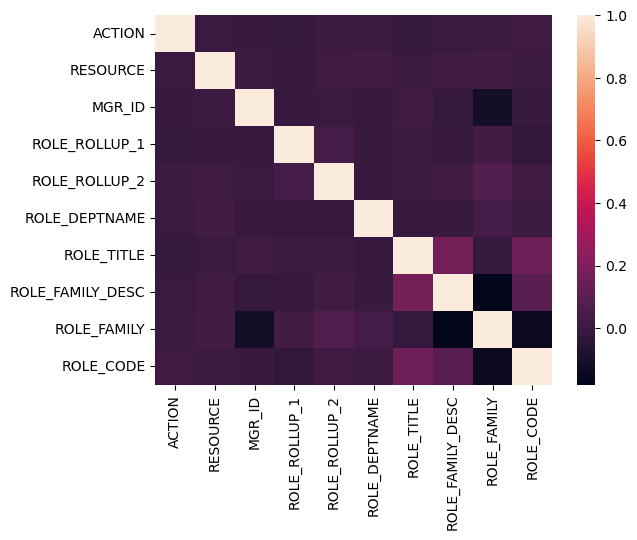

In [33]:
sns.heatmap(corr)

In [ ]:
# Train and test data

In [16]:
X = dfTrain.drop('ACTION',axis=1)
Y = dfTrain['ACTION']

In [17]:
X.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [18]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: ACTION, dtype: int64

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

###### 1. Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()
logModel.fit(X_train, Y_train)
Y_pred = logModel.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

0.9451971194922495
0.9718265671079878
[[   0  449]
 [   0 7744]]


Logistic Regression give accuracy and f1_score of 93.9% and 97.2% resp, but if we look into its confusion matrix, then we can reach to the conclusion that its not good model as it predicts everything as class 1 and has not predicted any itema as class 0, so it is affected by the biasness of model

###### 2. Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfModel = RandomForestClassifier()
rfModel.fit(X_train, Y_train)
Y_predRf = rfModel.predict(X_test)
print(accuracy_score(Y_test, Y_predRf))
print(f1_score(Y_test, Y_predRf))
print(confusion_matrix(Y_test, Y_predRf))

0.9512998901501282
0.9745161908411574
[[ 165  284]
 [ 115 7629]]


The improvement in accuracy from logistic regression to random forest is little but here we can see that confusion metrics shows that it has also classfied well better the the class which is having less number of examples in dataset which makes it really good method

###### 3. Ada boost Classifier

In [59]:
from sklearn.ensemble import AdaBoostClassifier
adaModel = AdaBoostClassifier()
adaModel.fit(X_train, Y_train)
Y_predAda = adaModel.predict(X_test)
print(accuracy_score(Y_test, Y_predAda))
print(f1_score(Y_test, Y_predAda))
print(confusion_matrix(Y_test, Y_predAda))

0.9451971194922495
0.9718265671079878
[[   0  449]
 [   0 7744]]


Here also problem is same as in logistic regression that it can't work well with biased class

###### 4. Gradient Boosting

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
modelGB = GradientBoostingClassifier()
modelGB.fit(X_train, Y_train)
Y_predGB = modelGB.predict(X_test)
print(accuracy_score(Y_test, Y_predGB))
print(f1_score(Y_test, Y_predGB))
print(confusion_matrix(Y_test, Y_predGB))

0.9459294519711949
0.9721890890828049
[[   7  442]
 [   1 7743]]


This is also not giving good result compare to random forest as here also it is able to predict corectly only 7 data points of class 0 whose elements are so less.

Hence the best model for our data if Random Forest.

###### Lets execute random forest on test data as we have choosen random forest as the final model

In [61]:
dfTest.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,32642,7792,118573,118574,117945,136261,128463,292795,119082
1,2,4696,14638,117961,118343,118514,118321,289122,255851,118322
2,3,22662,1760,118887,118888,120171,118396,255118,118398,118399
3,4,75078,7576,117961,118052,120671,118321,117906,257051,118322
4,5,39879,55668,117902,118041,117945,135951,134458,19776,119082


In [62]:
Xtest = dfTest.drop('id', axis=1)
Xtest.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,32642,7792,118573,118574,117945,136261,128463,292795,119082
1,4696,14638,117961,118343,118514,118321,289122,255851,118322
2,22662,1760,118887,118888,120171,118396,255118,118398,118399
3,75078,7576,117961,118052,120671,118321,117906,257051,118322
4,39879,55668,117902,118041,117945,135951,134458,19776,119082


In [64]:
predOutput = rfModel.predict(Xtest)
print(predOutput)

[1 1 1 ... 1 1 1]
